In [ ]:
# Install the unrar package
!apt-get install unrar -y

# Unrar the file
!unrar x Testing.rar extracted_files/

print("Files have been extracted to the 'extracted_files' folder.")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from Testing.rar

Creating    extracted_files                                           OK
Creating    extracted_files/Testing                                   OK
Creating    extracted_files/Testing/glioma_tumor                      OK
Extracting  extracted_files/Testing/glioma_tumor/image(1).jpg              0%  OK 
Extracting  extracted_files/Testing/glioma_tumor/image(10).jpg             0%  OK 
Extracting  extracted_files/Testing/glioma_tumor/image(100).jpg            0%  OK 
Extracting  extracted_files/Testing/glioma_tumor/image(11).jpg             1%  OK 
Extracting  extracted_files/Testing/glioma_tumor/image(12).jpg             1%  OK 
Extrac

In [ ]:
import torch

# Check PyTorch version
pt_version = torch.__version__
print(f"[INFO] Current PyTorch version: {pt_version} (should be 2.x+)")

# Install PyTorch 2.0 if necessary
if pt_version.split(".")[0] == "1": # Check if PyTorch version begins with 1
    !pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    print("[INFO] PyTorch 2.x installed, if you're on Google Colab, you may need to restart your runtime.\
          Though as of April 2023, Google Colab comes with PyTorch 2.0 pre-installed.")
    import torch
    pt_version = torch.__version__
    print(f"[INFO] Current PyTorch version: {pt_version} (should be 2.x+)")
else:
    print("[INFO] PyTorch 2.x installed, you'll be able to use the new features.")

[INFO] Current PyTorch version: 2.5.1+cu121 (should be 2.x+)
[INFO] PyTorch 2.x installed, you'll be able to use the new features.


In [ ]:
# Install the unrar package
!apt-get install unrar -y

# Unrar the file
!unrar x Training.rar extracted_files/

print("Files have been extracted to the 'extracted_files' folder.")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from Training.rar

Creating    extracted_files/Training                                  OK
Creating    extracted_files/Training/glioma_tumor                     OK
Extracting  extracted_files/Training/glioma_tumor/gg (1).jpg               0%  OK 
Extracting  extracted_files/Training/glioma_tumor/gg (10).jpg              0%  OK 
Extracting  extracted_files/Training/glioma_tumor/gg (100).jpg             0%  OK 
Extracting  extracted_files/Training/glioma_tumor/gg (101).jpg             0%  OK 
Extracting  extracted_files/Training/glioma_tumor/gg (102).jpg             0%  OK 
Extracting  extracted_files/Training/glioma_tumor/gg (103).jpg            

In [ ]:
import torch
print(torch.__version__)


print(f"PyTorch version: {torch.__version__}")


# Set the target device
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device}")


2.5.1+cu121
PyTorch version: 2.5.1+cu121
Using device: cuda


In [ ]:
import torch
import torchvision

def create_model(num_classes=4):
    """
    Creates a ResNet101 model with the latest weights and transforms via torchvision.
    """
    # Use the ResNet101 weights
    model_weights = torchvision.models.ResNet101_Weights.DEFAULT
    transforms = model_weights.transforms()
    model = torchvision.models.resnet101(weights=model_weights)

    # Adjust the number of output features in the model to match the number of classes
    model.fc = torch.nn.Linear(in_features=2048, out_features=num_classes)
    return model, transforms

# Example usage
model, transforms = create_model()


Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:01<00:00, 158MB/s]


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 128

In [ ]:
transforms.crop_size = IMAGE_SIZE
transforms.resize_size = IMAGE_SIZE
print(f"Updated data transforms:\n{transforms}")

Updated data transforms:
ImageClassification(
    crop_size=128
    resize_size=128
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [ ]:
import torchvision.transforms as T

In [ ]:
transform = T.Compose([
    T.Resize(128),                  # Resize the image to 128x128
    T.CenterCrop(128),              # Crop the image to 128x128
    T.ToTensor(),                   # Convert the image to a tensor
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

In [ ]:
data_dir = 'extracted_files'

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
train_dataset = datasets.ImageFolder(root=f'{data_dir}/Training', transform=transform)
test_dataset = datasets.ImageFolder(root=f'{data_dir}/Testing', transform=transform)
len(train_dataset), len(test_dataset)

(2870, 394)

In [ ]:
# Create DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
class_names=train_dataset.classes
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [ ]:

# Print details
print(f"Train dataloader length: {len(train_loader)} batches of size {BATCH_SIZE}")
print(f"Test dataloader length: {len(test_loader)} batches of size {BATCH_SIZE}")


Train dataloader length: 90 batches of size 32
Test dataloader length: 13 batches of size 32


In [ ]:
import time
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(epoch: int,
               model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device,
               disable_progress_bar: bool = False) -> Tuple[float, float]:
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  progress_bar = tqdm(
        enumerate(dataloader),
        desc=f"Training Epoch {epoch}",
        total=len(dataloader),
        disable=disable_progress_bar
    )

  for batch, (X, y) in progress_bar:
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metrics across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)

      # Update progress bar
      progress_bar.set_postfix(
            {
                "train_loss": train_loss / (batch + 1),
                "train_acc": train_acc / (batch + 1),
            }
        )


  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

def test_step(epoch: int,
              model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device,
              disable_progress_bar: bool = False) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Loop through data loader data batches
  progress_bar = tqdm(
      enumerate(dataloader),
      desc=f"Testing Epoch {epoch}",
      total=len(dataloader),
      disable=disable_progress_bar
  )

  # Turn on inference context manager
  with torch.no_grad(): # no_grad() required for PyTorch 2.0, I found some errors with `torch.inference_mode()`, please let me know if this is not the case
      # Loop through DataLoader batches
      for batch, (X, y) in progress_bar:
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

          # Update progress bar
          progress_bar.set_postfix(
              {
                  "test_loss": test_loss / (batch + 1),
                  "test_acc": test_acc / (batch + 1),
              }
          )

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
          disable_progress_bar: bool = False) -> Dict[str, List]:
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").
06],
                  test_acc: [0.3400, 0.2973]}
  """
  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": [],
      "train_epoch_time": [],
      "test_epoch_time": []
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs), disable=disable_progress_bar):

      # Perform training step and time it
      train_epoch_start_time = time.time()
      train_loss, train_acc = train_step(epoch=epoch,
                                        model=model,
                                        dataloader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer,
                                        device=device,
                                        disable_progress_bar=disable_progress_bar)
      train_epoch_end_time = time.time()
      train_epoch_time = train_epoch_end_time - train_epoch_start_time

      # Perform testing step and time it
      test_epoch_start_time = time.time()
      test_loss, test_acc = test_step(epoch=epoch,
                                      model=model,
                                      dataloader=test_dataloader,
                                      loss_fn=loss_fn,
                                      device=device,
                                      disable_progress_bar=disable_progress_bar)
      test_epoch_end_time = time.time()
      test_epoch_time = test_epoch_end_time - test_epoch_start_time

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f} | "
          f"train_epoch_time: {train_epoch_time:.4f} | "
          f"test_epoch_time: {test_epoch_time:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)
      results["train_epoch_time"].append(train_epoch_time)
      results["test_epoch_time"].append(test_epoch_time)

  # Return the filled results at the end of the epochs
  return results

In [ ]:
# Set the number of epochs as a constant
NUM_EPOCHS = 5

# Set the learning rate as a constant (this can be changed to get better results but for now we're just focused on time)
LEARNING_RATE = 0.003

In [ ]:
transforms

<module 'torchvision.transforms' from '/usr/local/lib/python3.10/dist-packages/torchvision/transforms/__init__.py'>

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Create loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Train model and track results
model_results = train(model=model,train_dataloader=train_loader,
                                      test_dataloader=test_loader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      epochs=NUM_EPOCHS,
                                      device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch 0:   0%|          | 0/90 [00:00<?, ?it/s]

Testing Epoch 0:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7295 | train_acc: 0.7395 | test_loss: 15.3890 | test_acc: 0.5697 | train_epoch_time: 27.6518 | test_epoch_time: 1.9722


Training Epoch 1:   0%|          | 0/90 [00:00<?, ?it/s]

Testing Epoch 1:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch: 2 | train_loss: 0.4178 | train_acc: 0.8518 | test_loss: 1.5563 | test_acc: 0.6163 | train_epoch_time: 25.8903 | test_epoch_time: 1.9389


Training Epoch 2:   0%|          | 0/90 [00:00<?, ?it/s]

Testing Epoch 2:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch: 3 | train_loss: 0.2993 | train_acc: 0.8997 | test_loss: 2.1526 | test_acc: 0.4817 | train_epoch_time: 26.1803 | test_epoch_time: 1.9362


Training Epoch 3:   0%|          | 0/90 [00:00<?, ?it/s]

Testing Epoch 3:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch: 4 | train_loss: 0.2359 | train_acc: 0.9189 | test_loss: 1.9374 | test_acc: 0.6817 | train_epoch_time: 26.1630 | test_epoch_time: 2.4664


Training Epoch 4:   0%|          | 0/90 [00:00<?, ?it/s]

Testing Epoch 4:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch: 5 | train_loss: 0.1557 | train_acc: 0.9486 | test_loss: 3.1339 | test_acc: 0.5938 | train_epoch_time: 26.0839 | test_epoch_time: 1.9446


In [ ]:
import torch
import os

# Create the 'models' directory if it does not exist
os.makedirs('models', exist_ok=True)

# Assuming your model is already created and trained (e.g., model)
# Save the model's state_dict
model_save_path = 'models/resnet.pth'
torch.save(model.state_dict(), model_save_path)

print(f"Model saved at {model_save_path}")


Model saved at models/resnet.pth


In [ ]:
loaded,loaded_transforms=create_model(num_classes=4)

loaded.load_state_dict(torch.load("models/resnet.pth"))

<ipython-input-109-bd75782dbe3c>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded.load_state_dict(torch.load("models/resnet.pth"))


<All keys matched successfully>

In [ ]:
from pathlib import Path

pretrained_megabytes=Path("models/resnet.pth").stat().st_size//(1024*1024)

print(f"size in  mega  bytes {pretrained_megabytes} MB ")

size in  mega  bytes 162 MB 


In [ ]:
from pathlib import Path
ciphar_10=Path("demos/ciphar_10/")
# make foodvision big demo directory
ciphar_10.mkdir(parents=True,exist_ok=True)
# make food vision big demo example directory
(ciphar_10/"examples").mkdir(parents=True,exist_ok=True)

In [ ]:
import random
from PIL import Image
from pathlib import Path
test_data_paths=list(Path(f'{data_dir}/Training').glob("*/*.jpg"))
test_data_paths[0]

PosixPath('extracted_files/Training/no_tumor/image(203).jpg')

In [ ]:
# ye random image select krte
random_image_path=random.sample(test_data_paths,k=1)[0]
random_image_path
# ipen target image
image=Image.open(random_image_path)
print(f"predicting on {random_image_path} " )

predicting on extracted_files/Training/no_tumor/image(21).jpg 


In [ ]:
random.sample(test_data_paths,k=4)

[PosixPath('extracted_files/Training/no_tumor/image(317).jpg'),
 PosixPath('extracted_files/Training/no_tumor/image(139).jpg'),
 PosixPath('extracted_files/Training/pituitary_tumor/p (418).jpg'),
 PosixPath('extracted_files/Training/pituitary_tumor/p (30).jpg')]

In [ ]:
example_list=[[str(filepath)]for filepath in random.sample(test_data_paths,k=4) ]
example_list

[['extracted_files/Training/glioma_tumor/gg (442).jpg'],
 ['extracted_files/Training/pituitary_tumor/p (453).jpg'],
 ['extracted_files/Training/meningioma_tumor/m (147).jpg'],
 ['extracted_files/Training/meningioma_tumor/m2 (109).jpg']]

In [ ]:
import shutil
from pathlib import Path
foodvision_mini_examples = [Path('extracted_files/Training/meningioma_tumor/m2 (43).jpg'),
                            Path('extracted_files/Training/no_tumor/image(221).jpg'),
                            Path('extracted_files/Training/pituitary_tumor/p (134).jpg'),
                            Path('extracted_files/Training/meningioma_tumor/m3 (244).jpg')]

# 3. Copy the three random images to the examples directory
for example in foodvision_mini_examples:
    destination = ciphar_10/"examples" / example.name
    print(f"[INFO] Copying {example} to {destination}")
    shutil.copy2(src=example, dst=destination)
    # src source
    # dest destination

[INFO] Copying extracted_files/Training/meningioma_tumor/m2 (43).jpg to demos/ciphar_10/examples/m2 (43).jpg
[INFO] Copying extracted_files/Training/no_tumor/image(221).jpg to demos/ciphar_10/examples/image(221).jpg
[INFO] Copying extracted_files/Training/pituitary_tumor/p (134).jpg to demos/ciphar_10/examples/p (134).jpg
[INFO] Copying extracted_files/Training/meningioma_tumor/m3 (244).jpg to demos/ciphar_10/examples/m3 (244).jpg


In [ ]:
# getting list of list
import os
example_list=[["examples/"+example]for example in os.listdir(ciphar_10/"examples")]

In [ ]:
example_list

[['examples/m2 (43).jpg'],
 ['examples/image(49).jpg'],
 ['examples/m3 (244).jpg'],
 ['examples/image(77).jpg'],
 ['examples/image(221).jpg'],
 ['examples/image(25).jpg'],
 ['examples/image(73).jpg'],
 ['examples/p (134).jpg']]

In [ ]:
!ls demos/ciphar_10/

app.py	class_names.txt  examples  model.py  requirements.txt  resnet.pth


In [ ]:
!mv models/resnet.pth demos/ciphar_10/

In [ ]:
class_names_path=ciphar_10/"class_names.txt"
class_names_path

PosixPath('demos/ciphar_10/class_names.txt')

In [ ]:
with open(class_names_path,"w") as f:
  print(f"saving class names to {class_names_path}")
  f.write("\n".join(class_names)) #one line per class


saving class names to demos/ciphar_10/class_names.txt


In [ ]:
# ab classname.txt se load krkr ceck krkr
with open(class_names_path,"r") as f:
  class_names_loaded=[food for food in f.readlines()]
class_names_loaded[:10]

['glioma_tumor\n', 'meningioma_tumor\n', 'no_tumor\n', 'pituitary_tumor']

In [ ]:
%%writefile demos/ciphar_10/model.py
import torch
import torchvision

import torch
from torch import nn
import torchvision

import torchvision.transforms as T
from torchvision.models import resnet101, ResNet101_Weights

import torch
import torchvision
import torchvision.transforms as T
from torchvision.models import resnet101

def create_model(num_classes=4):
    # Define your own transformations (resize, crop, to tensor, normalize)
    transform = T.Compose([
        T.Resize(128),  # Resize the image to 128x128
        T.CenterCrop(128),  # Crop the image to 128x128
        T.ToTensor(),  # Convert the image to a tensor
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
    ])

    # Load the ResNet101 model with the default weights
    model = torchvision.models.resnet101(weights=torchvision.models.ResNet101_Weights.DEFAULT)

    # Adjust the output layer to match the number of classes
    model.fc = torch.nn.Linear(in_features=2048, out_features=num_classes)

    return model, transform





Overwriting demos/ciphar_10/model.py


In [ ]:
%%writefile demos/ciphar_10/app.py
# 1
import gradio as gr
import os
import torch
from model import create_model
from typing import Dict

# setup class names
with open("class_names.txt", "r") as f:
    class_names = [food_name.strip() for food_name in f.readlines()]

# model and transforms
model, model_transforms = create_model(num_classes=4)

# load the saved weights
model.load_state_dict(
    torch.load(f="resnet.pth", map_location=torch.device("cpu"))
)

# predict function
def predict(img):
    try:
        # Check if image is received
        if img is None:
            return "No image uploaded!"

        # Model loading (assuming effnetb2 is defined in create_model)
        model, model_transforms = create_model(num_classes=4)
        model.load_state_dict(
            torch.load(f="resnet.pth", map_location=torch.device("cpu"))
        )

        img = model_transforms(img).unsqueeze(0)  # Add batch dim
        model.eval()
        with torch.inference_mode():
            pred_logit = model(img)
            pred_probs = torch.softmax(pred_logit, dim=1)
            pred_labels_and_probs = {
                class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))
            }

        return pred_labels_and_probs
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Gradio app setup
title = "Brain Tumor Detection"
# description = "Classify images into 10 CIFAR-10 classes using a ResNet50 model. Quick, accurate, and a great demonstration of computer vision in action."
description = "Classify MRI images into 4 categories of brain tumors using a deep learning model. Accurate detection and classification for medical imaging applications."

# Example list
example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create the Gradio demo
demo = gr.Interface(
    fn=predict,  # maps input to output
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=4, label="Predictions"),
    examples=example_list,
    title=title,
    description=description
)

# Launch the app
demo.launch(
    debug=False
    # Prints error locally like in Google Colab
    # Generate link publicly, like share with public
)


Overwriting demos/ciphar_10/app.py


In [ ]:
%%writefile demos/ciphar_10/requirements.txt
torch
torchvision
gradio

Overwriting demos/ciphar_10/requirements.txt


In [ ]:
# wese bhi download krlo
# mgr yhn code se zip krkr download krre
!cd demos/ciphar_10 && zip -r ../ciphar_10.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints"

updating: app.py (deflated 55%)
updating: class_names.txt (deflated 31%)
updating: examples/ (stored 0%)
updating: examples/image(49).jpg (deflated 8%)
updating: examples/image(77).jpg (deflated 8%)
updating: examples/image(25).jpg (deflated 16%)
updating: examples/image(73).jpg (deflated 9%)
updating: model.py (deflated 57%)
updating: requirements.txt (deflated 4%)
updating: resnet.pth (deflated 7%)
  adding: examples/m2 (43).jpg (deflated 1%)
  adding: examples/m3 (244).jpg (deflated 2%)
  adding: examples/image(221).jpg (deflated 7%)
  adding: examples/p (134).jpg (deflated 1%)


In [ ]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

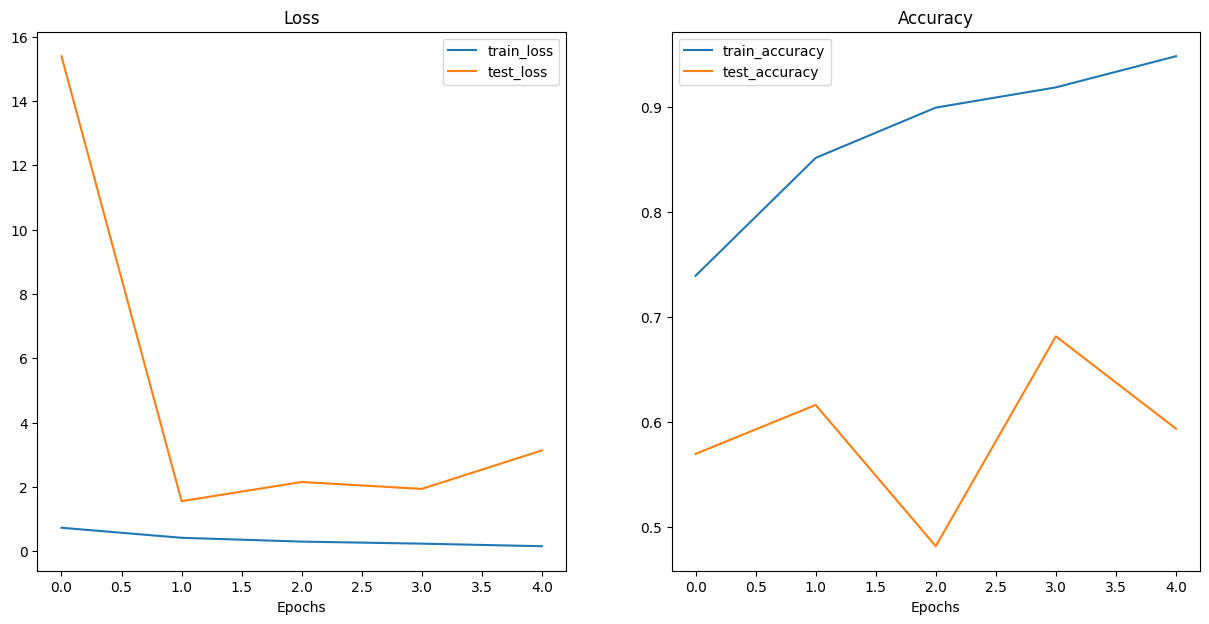

In [ ]:
from helper_functions import plot_loss_curves
plot_loss_curves(model_results)